In [3]:
## EDA - Import libraries and load the Dataset
import pandas as pd
df = pd.read_csv("cleaned_covid_data.csv")
df.head()

,country_region,Confirmed,Deaths,Recovered,Active,new_cases,new_deaths,new_recovered,deaths_100_cases,recovered_100_cases,deaths_100_recovered,confirmed_last_week,weekly_case_change,weekly_percentage_increase,who_region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
## Descriptive Statistics
##calculate mean,median.mode.standard deviation and range
desc_stats = {
    'Mean': df.mean(numeric_only=True),
    'Median': df.median(numeric_only=True),
    'Mode': df.mode(numeric_only=True).iloc[0],
    'Standard Deviation': df.std(numeric_only=True),
    'Range': df.max(numeric_only=True) - df.min(numeric_only=True)
}

df_descriptive_stats = pd.DataFrame(desc_stats)
print(df_descriptive_stats)

                                    Mean   Median  Mode  Standard Deviation  \
Confirmed                   8.813094e+04  5059.00  24.0       383318.663831   
Deaths                      3.497519e+03   108.00   0.0        14100.002482   
Recovered                   5.063148e+04  2815.00   0.0       190188.189643   
Active                      3.400194e+04  1600.00   0.0       213326.173371   
new_cases                   1.222957e+03    49.00   0.0         5710.374790   
new_deaths                  2.895722e+01     1.00   0.0          120.037173   
new_recovered               9.338128e+02    22.00   0.0         4197.719635   
deaths_100_cases            3.019519e+00     2.15   0.0            3.454302   
recovered_100_cases         6.482053e+01    71.32   0.0           26.287694   
deaths_100_recovered                 inf     3.62   0.0                 NaN   
confirmed_last_week         7.868248e+04  5020.00  19.0       338273.676567   
weekly_case_change          9.448460e+03   432.00   

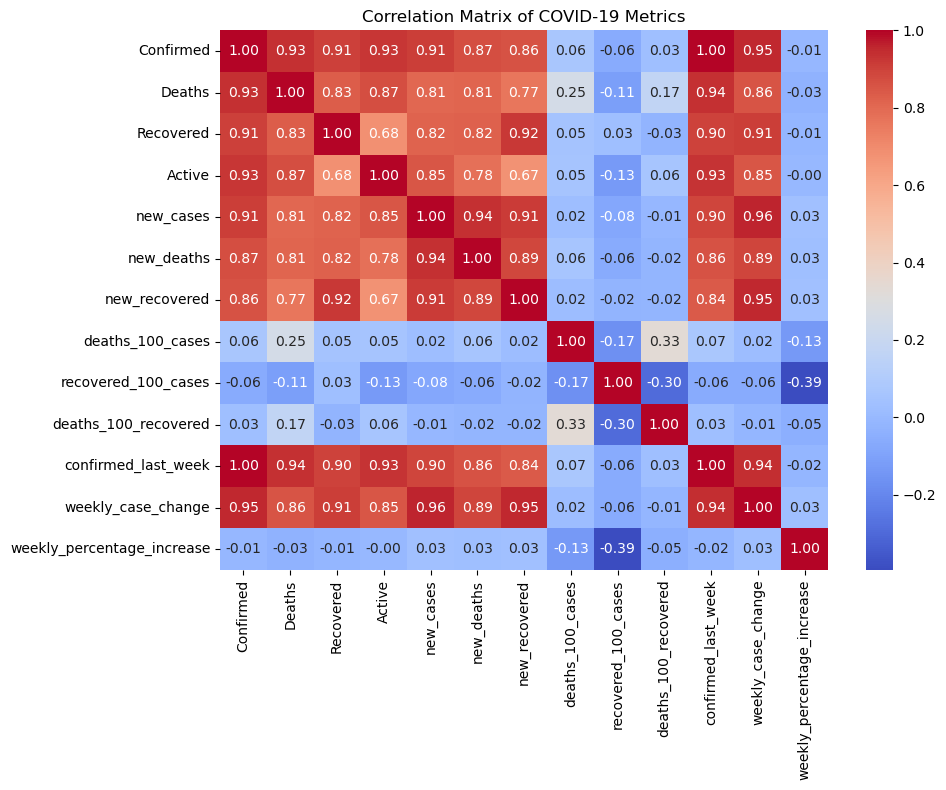

In [8]:
##Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Task 2: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of COVID-19 Metrics")
plt.tight_layout()
plt.show()

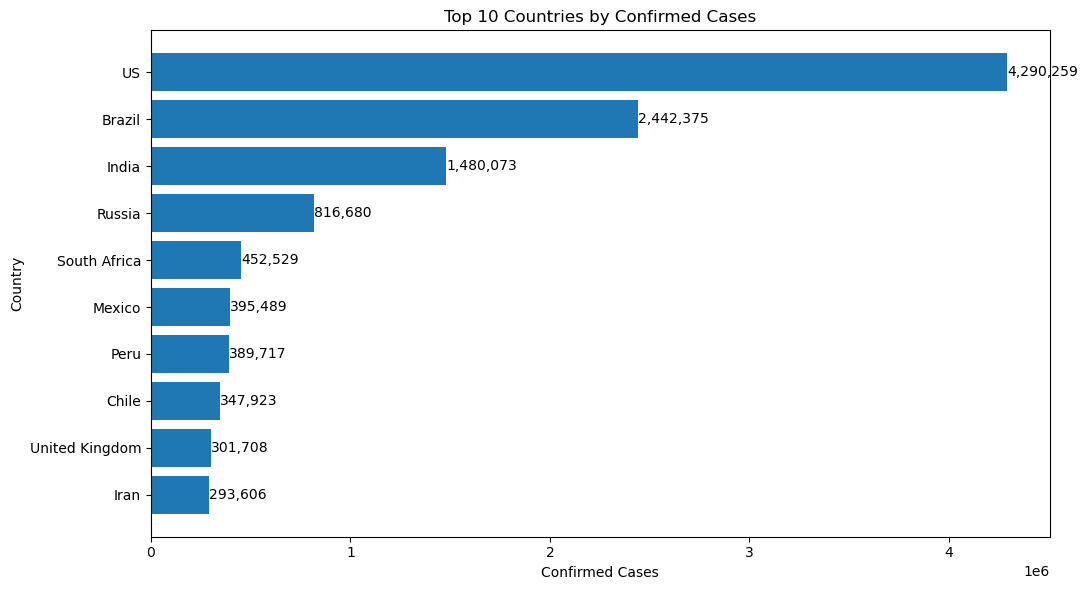

In [11]:
top_confirmed = df.nlargest(10, 'Confirmed').sort_values('Confirmed')

plt.figure(figsize=(11, 6))
bars = plt.barh(top_confirmed['country_region'], top_confirmed['Confirmed'])

plt.title("Top 10 Countries by Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")

# Annotate bars with numbers
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width()):,}', va='center')

plt.tight_layout()
plt.show()

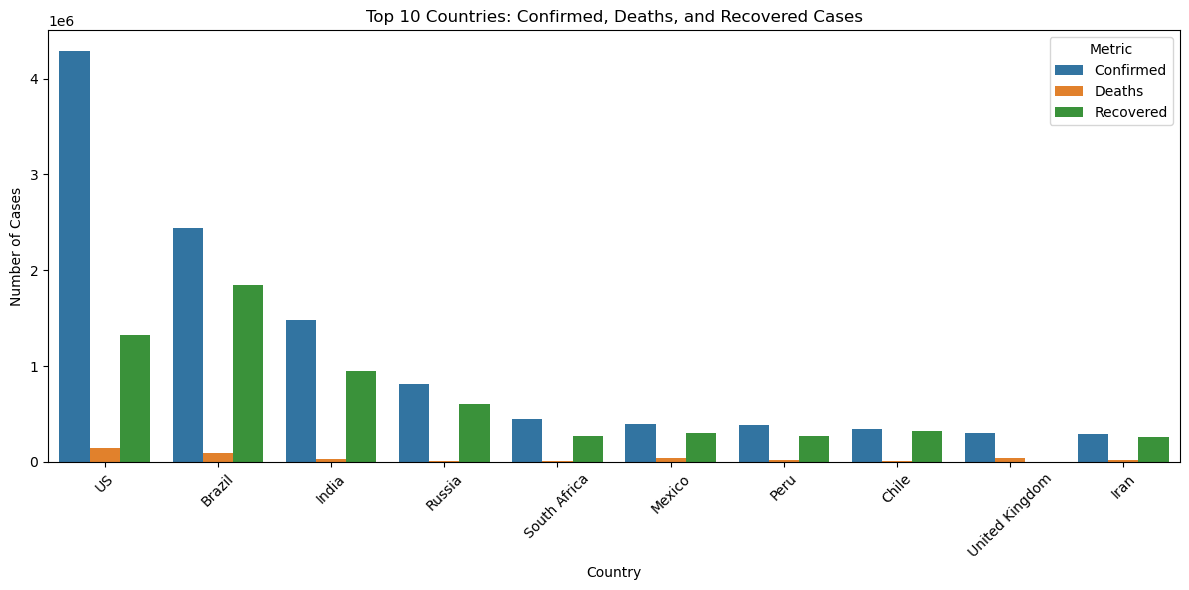

In [16]:
# Create a grouped bar chart comparing Confirmed, Deaths, and Recovered for top 10 countries

# Select top 10 countries by confirmed cases
top_10 = df.nlargest(10, 'Confirmed')[['country_region', 'Confirmed', 'Deaths', 'Recovered']]

# Melt the data to long format for grouped bar chart
top_10_melted = top_10.melt(id_vars='country_region', value_vars=['Confirmed', 'Deaths', 'Recovered'], ## melt() turns you table into wide formate
                            var_name='Metric', value_name='Count')

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_melted, x='country_region', y='Count', hue='Metric') ## create a grouped barchart
plt.title('Top 10 Countries: Confirmed, Deaths, and Recovered Cases')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45) # rotate x -asis labels to prevent overlap
plt.tight_layout() ## prevent label cutoffs
plt.show()